In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import matplotlib.pyplot as plt

In [3]:
os.chdir("C:\\Users\\Seijsener\\Ironhack\\unit4\\week_9")

In [4]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [5]:
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


If the "customer" column contains unique identifiers (keys) for each row, and these identifiers do not convey meaningful information about the customers themselves, it's typically a good idea to treat this column as an index. Setting the "customer" column as the index is useful for quick access to individual records based on their unique identifiers.

In [6]:
customer_df.set_index('Customer', inplace=True)

In [7]:
numerical_df = customer_df.select_dtypes(include=['float64', 'int64'])

print("Numerical DataFrame:")
print(numerical_df.head())

Numerical DataFrame:
          Customer Lifetime Value  Income  Monthly Premium Auto  \
Customer                                                          
BU79786               2763.519279   56274                    69   
QZ44356               6979.535903       0                    94   
AI49188              12887.431650   48767                   108   
WW63253               7645.861827       0                   106   
HB64268               2813.692575   43836                    73   

          Months Since Last Claim  Months Since Policy Inception  \
Customer                                                           
BU79786                        32                              5   
QZ44356                        13                             42   
AI49188                        18                             38   
WW63253                        18                             65   
HB64268                        12                             44   

          Number of Open Complai

In [8]:
categorical_df = customer_df.select_dtypes(include=['object', 'category'])

print("\nCategorical DataFrame:")
print(categorical_df.head())


Categorical DataFrame:
               State Response  Coverage Education Effective To Date  \
Customer                                                              
BU79786   Washington       No     Basic  Bachelor           2/24/11   
QZ44356      Arizona       No  Extended  Bachelor           1/31/11   
AI49188       Nevada       No   Premium  Bachelor           2/19/11   
WW63253   California       No     Basic  Bachelor           1/20/11   
HB64268   Washington       No     Basic  Bachelor            2/3/11   

         EmploymentStatus Gender Location Code Marital Status     Policy Type  \
Customer                                                                        
BU79786          Employed      F      Suburban        Married  Corporate Auto   
QZ44356        Unemployed      F      Suburban         Single   Personal Auto   
AI49188          Employed      F      Suburban        Married   Personal Auto   
WW63253        Unemployed      M      Suburban        Married  Corporate 

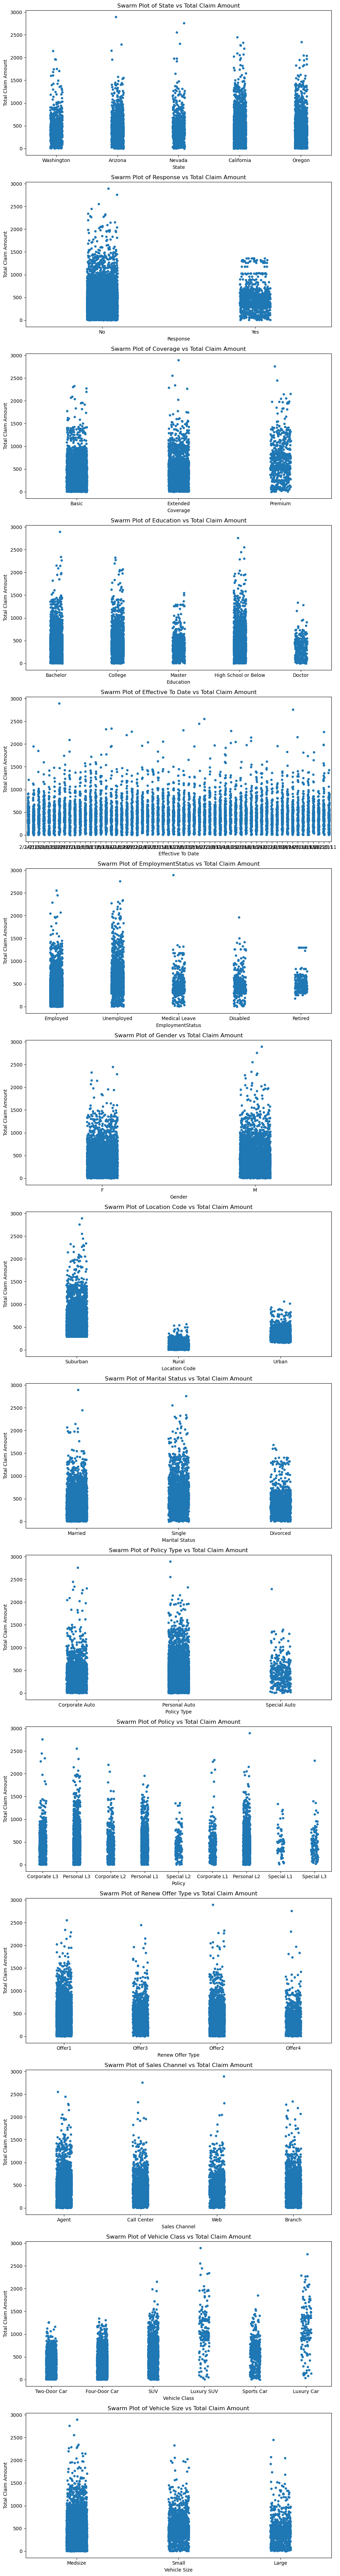

In [9]:
categorical_columns = customer_df.select_dtypes(include=['object', 'category']).columns

target_variable = 'Total Claim Amount'

fig, axes = plt.subplots(nrows=len(categorical_columns), figsize=(10, 5 * len(categorical_columns)))

for i, variable in enumerate(categorical_columns):
    sns.stripplot(x=variable, y=target_variable, data=customer_df, ax=axes[i], size=5)
    axes[i].set_title(f'Swarm Plot of {variable} vs {target_variable}')

plt.tight_layout()
plt.show()

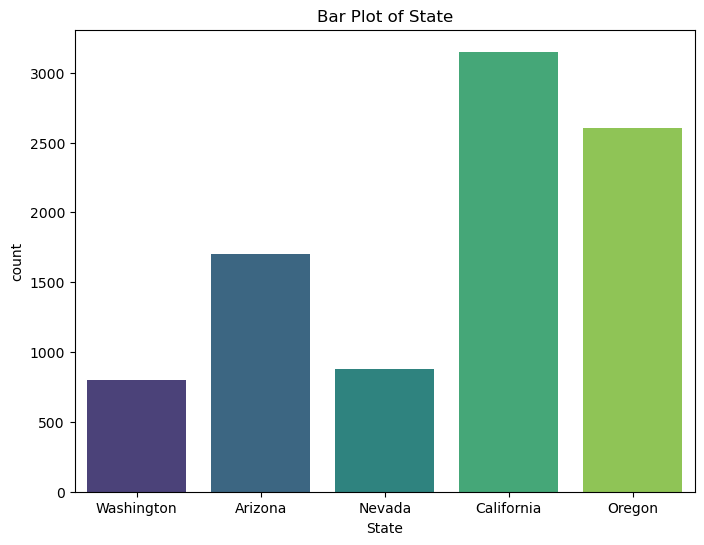

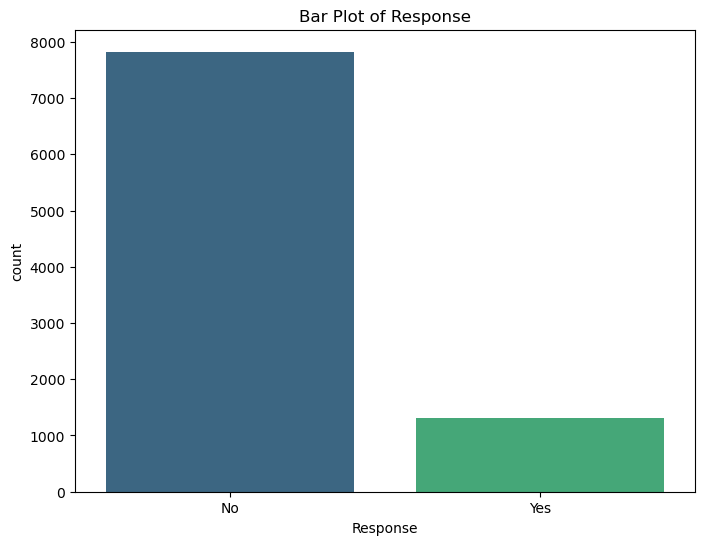

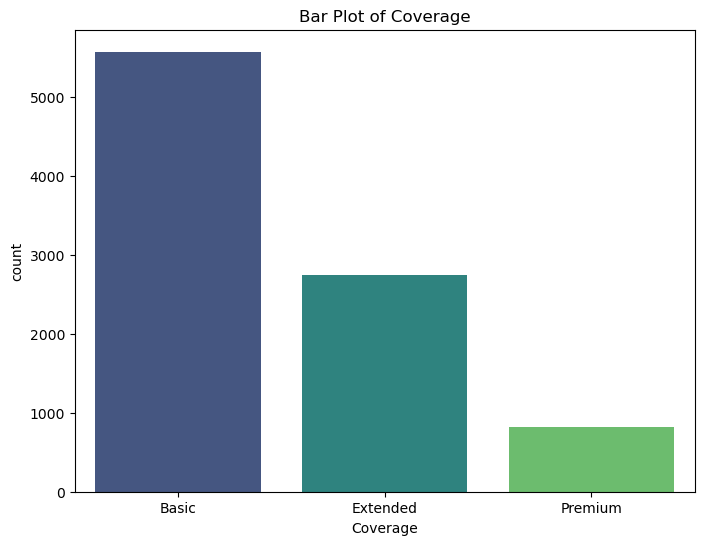

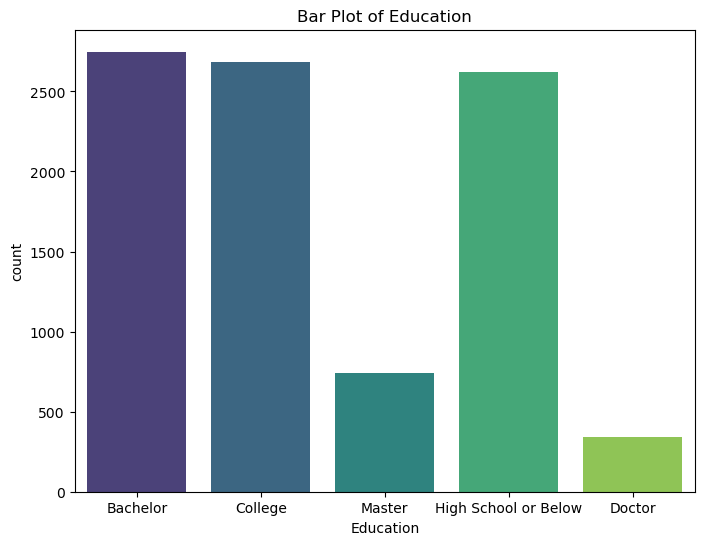

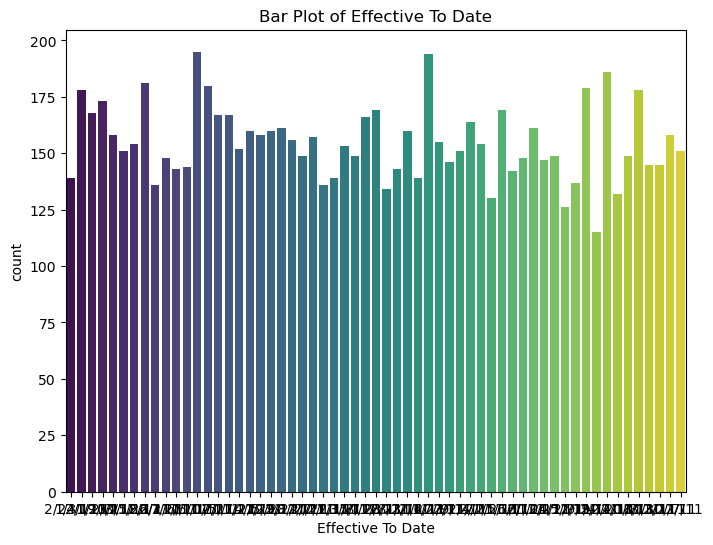

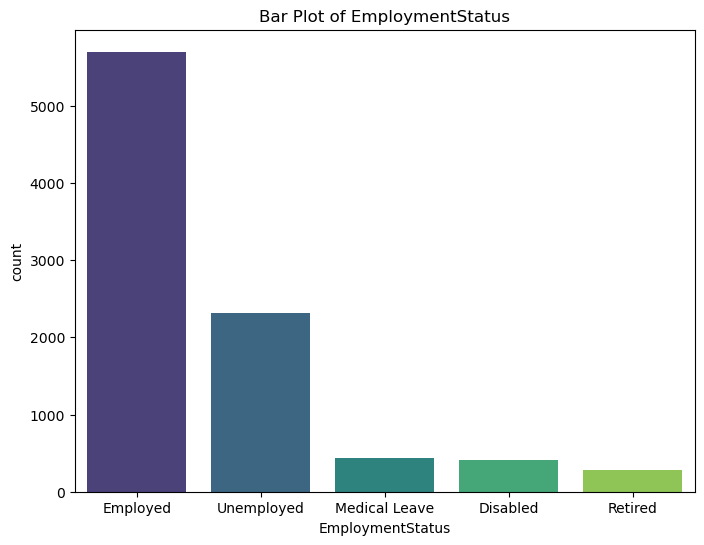

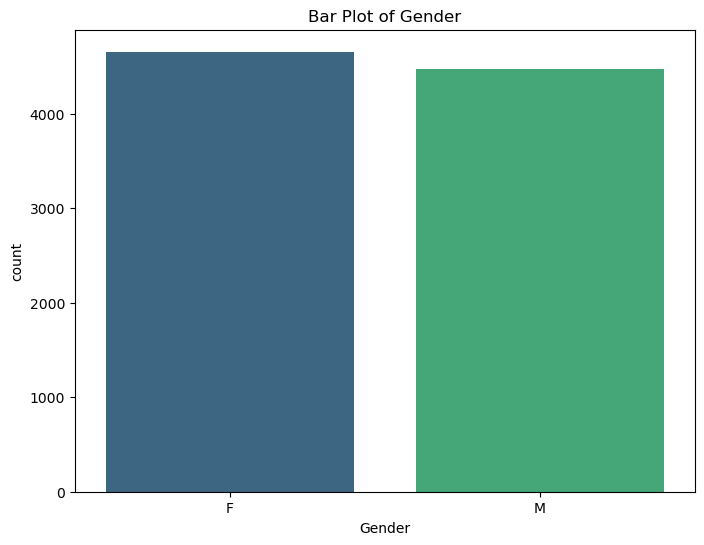

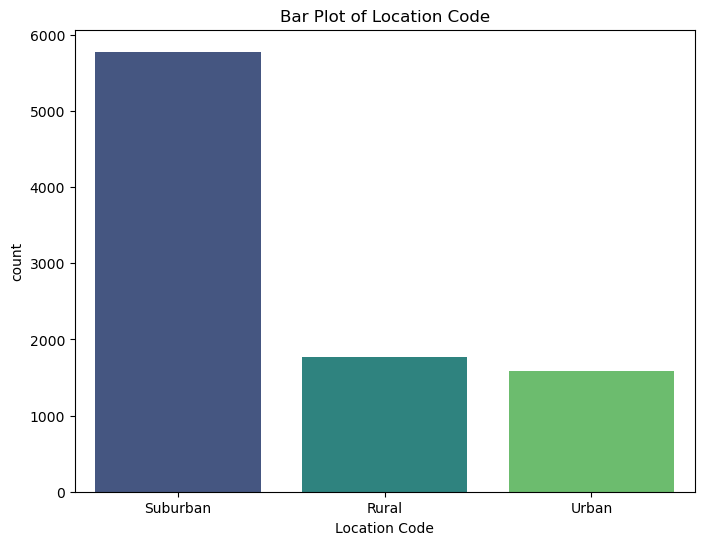

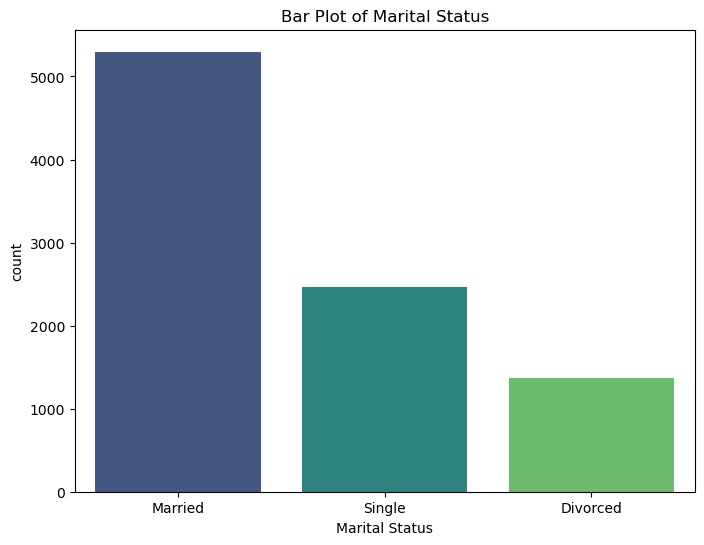

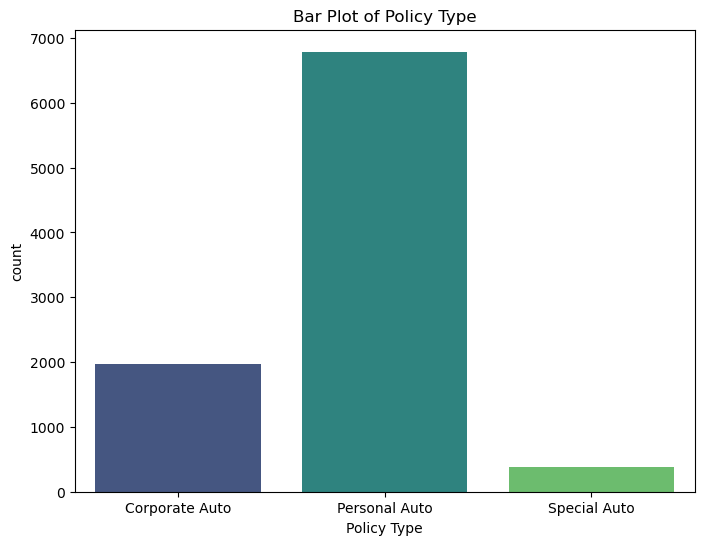

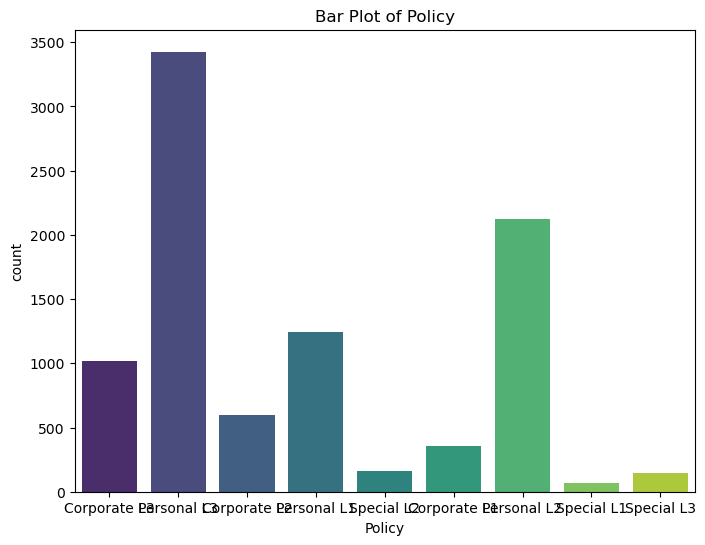

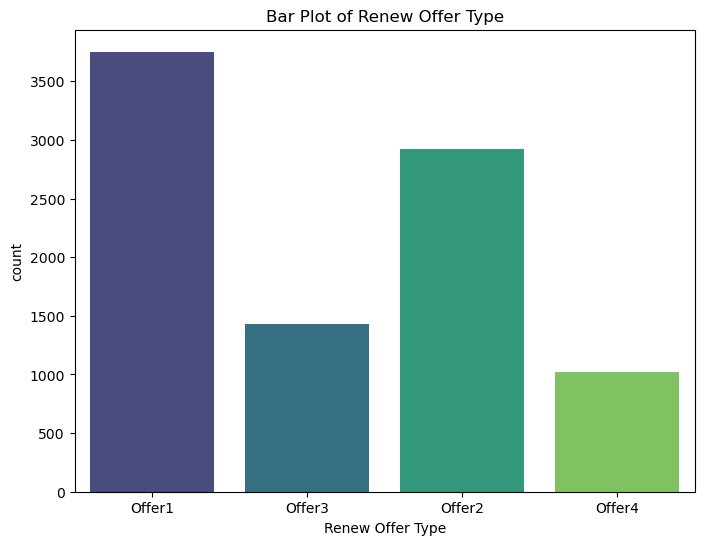

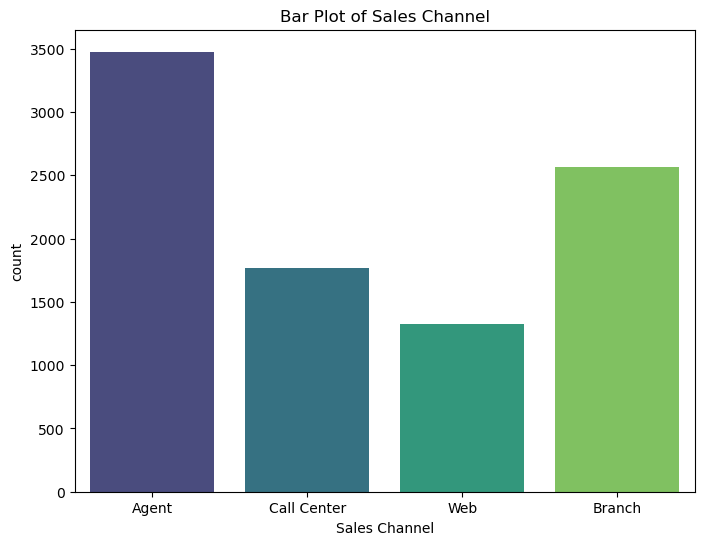

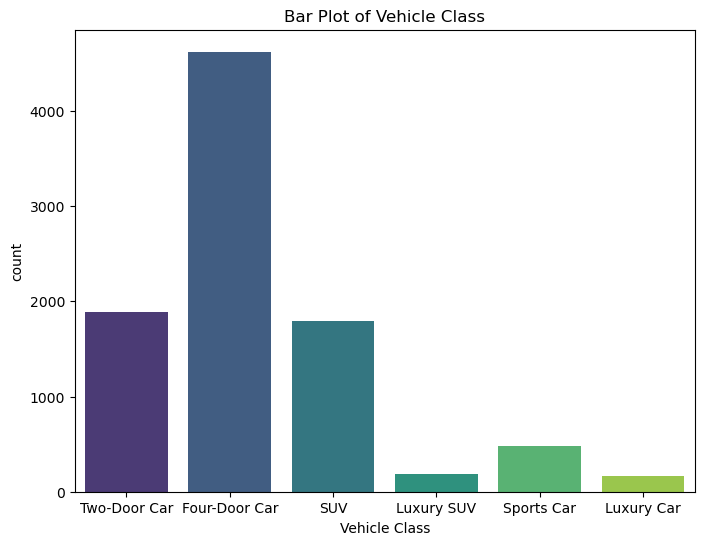

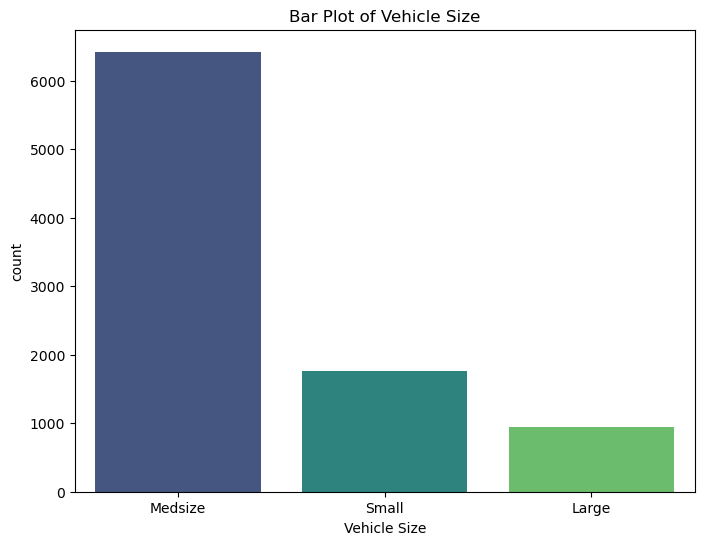

In [10]:
categorical_df = customer_df[categorical_columns].copy()

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=categorical_df, palette='viridis')
    plt.title(f'Bar Plot of {column}')
    plt.show()

In [11]:
for column in categorical_columns:
    print(customer_df[column].value_counts())

State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64
Response
No     7826
Yes    1308
Name: count, dtype: int64
Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64
Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64
Effective To Date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/

In [12]:
customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])

C:\Users\Seijsener\AppData\Local\Temp\ipykernel_16664\4285178242.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['Effective To Date'] = pd.to_datetime(customer_df['Effective To Date'])


In [13]:
customer_df['Month'] = customer_df['Effective To Date'].dt.month
customer_df['Year'] = customer_df['Effective To Date'].dt.year

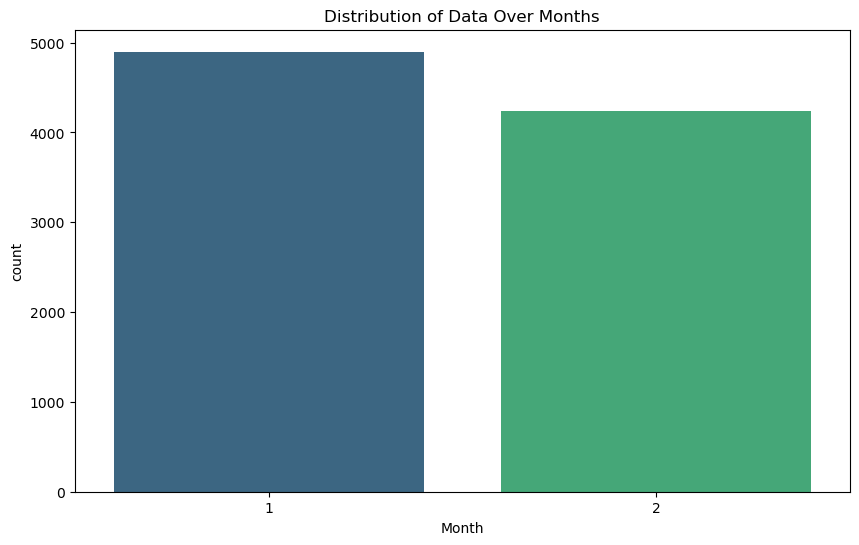

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=customer_df, palette='viridis')
plt.title('Distribution of Data Over Months')
plt.show()

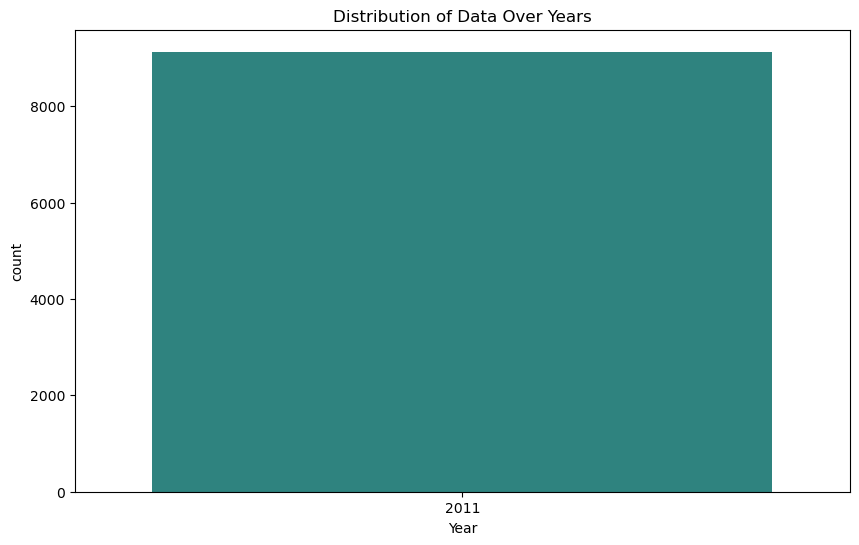

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=customer_df, palette='viridis')
plt.title('Distribution of Data Over Years')
plt.show()

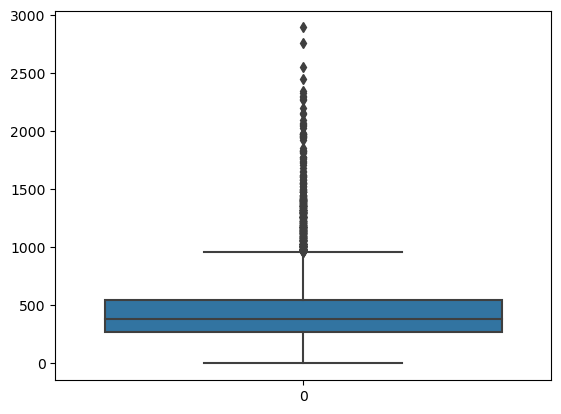

In [16]:
sns.boxplot(customer_df['Total Claim Amount'])
plt.show()

C:\Users\Seijsener\AppData\Local\Temp\ipykernel_16664\3654743841.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_df['Total Claim Amount'])


<Axes: xlabel='Total Claim Amount', ylabel='Density'>

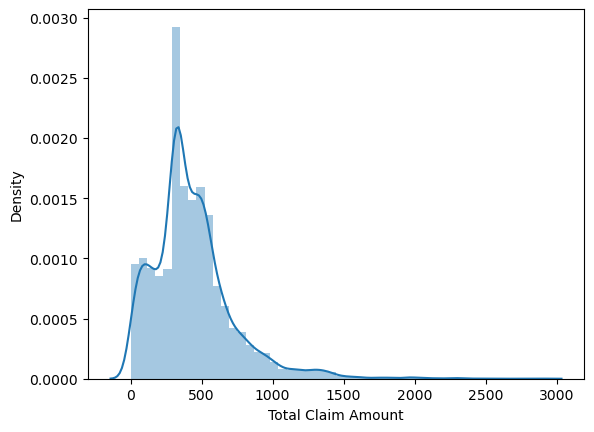

In [17]:
sns.distplot(customer_df['Total Claim Amount'])

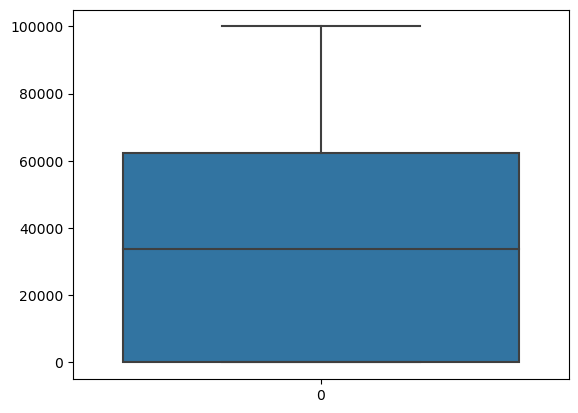

In [18]:
sns.boxplot(customer_df['Income'])
plt.show()

C:\Users\Seijsener\AppData\Local\Temp\ipykernel_16664\633065688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

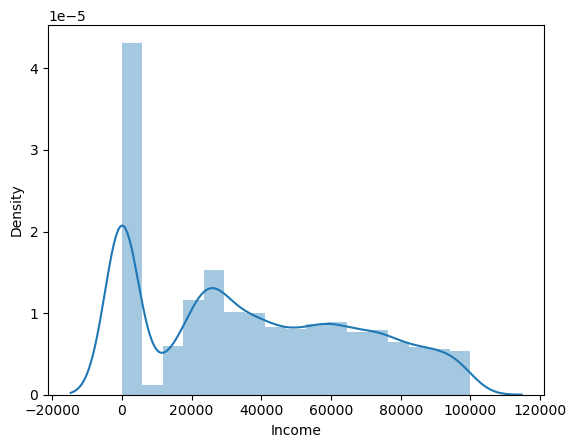

In [19]:
sns.distplot(customer_df['Income'])

In [20]:
def remove_outliers_iqr(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_no_outliers

customer_df = remove_outliers_iqr(customer_df, 'Total Claim Amount')

In [21]:
print(customer_df.head())

               State  Customer Lifetime Value Response Coverage Education  \
Customer                                                                    
BU79786   Washington              2763.519279       No    Basic  Bachelor   
AI49188       Nevada             12887.431650       No  Premium  Bachelor   
WW63253   California              7645.861827       No    Basic  Bachelor   
HB64268   Washington              2813.692575       No    Basic  Bachelor   
OC83172       Oregon              8256.297800      Yes    Basic  Bachelor   

         Effective To Date EmploymentStatus Gender  Income Location Code  ...  \
Customer                                                                  ...   
BU79786         2011-02-24         Employed      F   56274      Suburban  ...   
AI49188         2011-02-19         Employed      F   48767      Suburban  ...   
WW63253         2011-01-20       Unemployed      M       0      Suburban  ...   
HB64268         2011-02-03         Employed      M   43

C:\Users\Seijsener\AppData\Local\Temp\ipykernel_16664\3654743841.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_df['Total Claim Amount'])


<Axes: xlabel='Total Claim Amount', ylabel='Density'>

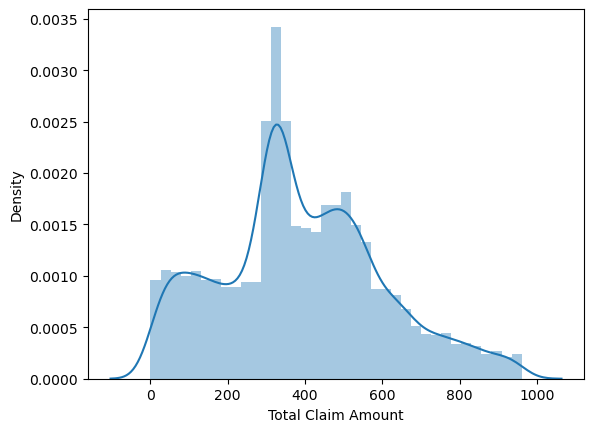

In [22]:
sns.distplot(customer_df['Total Claim Amount'])

C:\Users\Seijsener\AppData\Local\Temp\ipykernel_16664\3714474845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_df['Customer Lifetime Value'])


<Axes: xlabel='Customer Lifetime Value', ylabel='Density'>

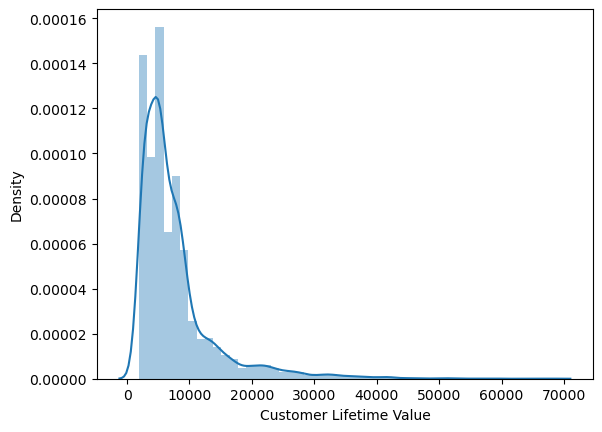

In [23]:
sns.distplot(customer_df['Customer Lifetime Value'])

In [24]:
customer_df = remove_outliers_iqr(customer_df, 'Customer Lifetime Value')

In [25]:
customer_df = remove_outliers_iqr(customer_df, 'Income')

C:\Users\Seijsener\AppData\Local\Temp\ipykernel_16664\3714474845.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_df['Customer Lifetime Value'])


<Axes: xlabel='Customer Lifetime Value', ylabel='Density'>

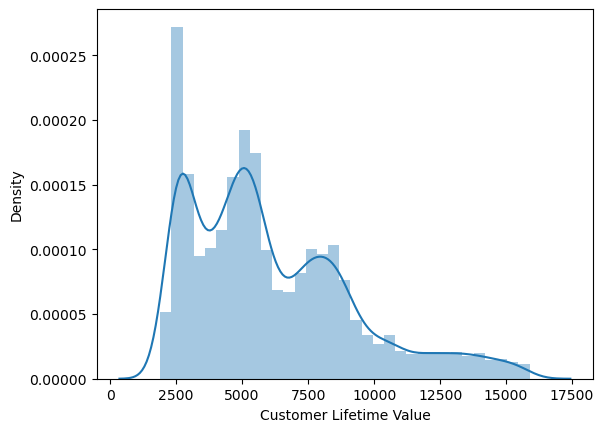

In [26]:
sns.distplot(customer_df['Customer Lifetime Value'])

In [27]:
customer_df_wrangling = customer_df.copy()

In [28]:
continuous_columns = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
                       'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies',
                       'Total Claim Amount']

scaler = MinMaxScaler()
customer_df_wrangling[continuous_columns] = scaler.fit_transform(customer_df_wrangling[continuous_columns])

In [29]:
categorical_columns = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
                       'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
                       'Sales Channel', 'Vehicle Class', 'Vehicle Size']

customer_df_wrangling_encoded = pd.get_dummies(customer_df_wrangling, columns=categorical_columns)

In [30]:
# Drop the original categorical columns (if they exist)
categorical_columns_to_drop = [col for col in categorical_columns if col in customer_df_wrangling_encoded.columns]
customer_df_wrangling_encoded = customer_df_wrangling_encoded.drop(categorical_columns_to_drop, axis=1)

In [31]:
# Extract day, week, and month
customer_df_wrangling['Day'] = customer_df_wrangling['Effective To Date'].dt.day
customer_df_wrangling['Week'] = customer_df_wrangling['Effective To Date'].dt.isocalendar().week
customer_df_wrangling['Month'] = customer_df_wrangling['Effective To Date'].dt.month

# Drop the original 'Effective To Date' column
customer_df_wrangling = customer_df_wrangling.drop(['Effective To Date'], axis=1)

In [32]:
customer_df_wrangling

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month,Year,Day,Week
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,0.061875,No,Basic,Bachelor,Employed,F,0.562847,Suburban,Married,...,Corporate L3,Offer1,Agent,0.400735,Two-Door Car,Medsize,2,2011,24,8
AI49188,Nevada,0.785631,No,Premium,Bachelor,Employed,F,0.487763,Suburban,Married,...,Personal L3,Offer1,Agent,0.589962,Two-Door Car,Medsize,2,2011,19,7
WW63253,California,0.410913,No,Basic,Bachelor,Unemployed,M,0.000000,Suburban,Married,...,Corporate L2,Offer1,Call Center,0.551847,SUV,Medsize,1,2011,20,3
HB64268,Washington,0.065462,No,Basic,Bachelor,Employed,M,0.438443,Rural,Single,...,Personal L1,Offer1,Agent,0.143781,Four-Door Car,Medsize,2,2011,3,5
OC83172,Oregon,0.454552,Yes,Basic,Bachelor,Employed,F,0.629140,Rural,Married,...,Personal L3,Offer2,Web,0.165918,Two-Door Car,Medsize,1,2011,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YM19146,California,0.157448,No,Premium,College,Employed,F,0.477701,Suburban,Single,...,Personal L2,Offer1,Branch,0.563723,Four-Door Car,Large,1,2011,6,1
PK87824,California,0.085681,Yes,Extended,College,Employed,F,0.216081,Suburban,Divorced,...,Corporate L3,Offer1,Branch,0.394890,Four-Door Car,Medsize,2,2011,12,6
TD14365,California,0.447946,No,Extended,Bachelor,Unemployed,M,0.000000,Suburban,Single,...,Corporate L2,Offer1,Branch,0.823617,Four-Door Car,Medsize,2,2011,6,5


using the get_dummies function from pandas to one-hot encode categorical variables. 

In [33]:
customer_df_wrangling_encoded = pd.get_dummies(customer_df_wrangling, drop_first=True)

In [34]:
customer_df_wrangling_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7940 entries, BU79786 to Y167826
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer Lifetime Value         7940 non-null   float64
 1   Income                          7940 non-null   float64
 2   Monthly Premium Auto            7940 non-null   float64
 3   Months Since Last Claim         7940 non-null   float64
 4   Months Since Policy Inception   7940 non-null   float64
 5   Number of Open Complaints       7940 non-null   float64
 6   Number of Policies              7940 non-null   float64
 7   Total Claim Amount              7940 non-null   float64
 8   Month                           7940 non-null   int32  
 9   Year                            7940 non-null   int32  
 10  Day                             7940 non-null   int32  
 11  Week                            7940 non-null   UInt32 
 12  State_California              

In [35]:
customer_df_wrangling_encoded = pd.get_dummies(customer_df_wrangling, columns=['State'], drop_first=True)

customer_df_wrangling_encoded['Coverage'] = customer_df_wrangling_encoded['Coverage'].map({'Basic': 0, 'Extended': 1, 'Premium': 2})


employment_status_map = {'Employed': 0, 'Unemployed': 1, 'Medical Leave': 2, 'Disabled': 3, 'Retired': 4}
customer_df_wrangling_encoded['EmploymentStatus'] = customer_df_wrangling_encoded['EmploymentStatus'].map(employment_status_map)

location_code_map = {'Rural': 0, 'Suburban': 1, 'Urban': 2}
customer_df_wrangling_encoded['Location Code'] = customer_df_wrangling_encoded['Location Code'].map(location_code_map)

customer_df_wrangling_encoded = pd.get_dummies(customer_df_wrangling_encoded, columns=['Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class'], drop_first=True)

customer_df_wrangling_encoded = pd.get_dummies(customer_df_wrangling_encoded, columns=['Vehicle Size'], drop_first=True)

In [36]:
customer_df_wrangling_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7940 entries, BU79786 to Y167826
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        7940 non-null   float64
 1   Response                       7940 non-null   object 
 2   Coverage                       7940 non-null   int64  
 3   Education                      7940 non-null   object 
 4   EmploymentStatus               7940 non-null   int64  
 5   Gender                         7940 non-null   object 
 6   Income                         7940 non-null   float64
 7   Location Code                  7940 non-null   int64  
 8   Monthly Premium Auto           7940 non-null   float64
 9   Months Since Last Claim        7940 non-null   float64
 10  Months Since Policy Inception  7940 non-null   float64
 11  Number of Open Complaints      7940 non-null   float64
 12  Number of Policies             7940 non-null